In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

# Clean Data

In [55]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_train_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [60]:
raw_data=pd.read_csv("qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv", sep=';', parse_dates=['DATE/HEURE'])
raw_data

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10 08:00:00+08:00,33,58,58,522,"21,3",44
1,2022-10-10 07:00:00+08:00,53,63,48,540,"21,5","43,3"
2,2022-10-10 06:00:00+08:00,31,62,39,551,"21,6","42,6"
3,2022-10-10 05:00:00+08:00,21,63,31,542,21,"44,7"
4,2022-10-10 04:00:00+08:00,10,48,30,532,"20,8","45,2"
...,...,...,...,...,...,...,...
85432,2013-01-01 13:00:00+08:00,27,57,15,464,15,"63,3"
85433,2013-01-01 12:00:00+08:00,27,56,22,481,"14,9","63,7"
85434,2013-01-01 11:00:00+08:00,22,52,45,490,"14,9","63,3"
85435,2013-01-01 10:00:00+08:00,43,61,18,536,"14,9",65


In [61]:
raw_data['NO'].unique()

array(['33', '53', '31', '21', '10', '4', '3', '8', '11', '14', '17',
       '15', '35', '34', '25', '24', '7', '5', '6', '9', '16', '27', '67',
       '12', '45', '98', '156', 'ND', '155', '122', '118', '110', '94',
       '74', '145', '257', '144', '87', '43', '13', '28', '2', '18', '42',
       '22', '46', '107', '104', '99', '121', '135', '82', '56', '41',
       '50', '71', '37', '29', '<2', '20', '69', '79', '81', '30', '39',
       '48', '26', '60', '61', '19', '23', '44', '58', '76', '55', '80',
       '36', '130', '38', '32', '51', '65', '59', '40', '113', '105',
       '77', '120', '49', '64', '73', '84', '54', '90', '47', '75', '92',
       '57', '66', '52', '103', '114', '68', '62', '93', '100', '78',
       '63', '70', '88', '83', '109', '111', '138', '128', '127', '91',
       '95', '165', '204', '198', '224', '190', '210', '265', '216',
       '196', '168', '126', '131', '174', '195', '139', '124', '164',
       '161', '147', '112', '115', '86', '160', '97', '133', '143'

In [62]:
raw_data['NO2'].unique()

array(['58', '63', '62', '48', '31', '27', '26', '25', '33', '29', '37',
       '38', '39', '44', '47', '50', '52', '49', '35', '23', '19', '17',
       '24', '30', '32', '22', '34', '57', '67', '51', '54', '59', '41',
       '45', '40', '42', '60', '69', 'ND', '56', '81', '72', '66', '53',
       '43', '46', '15', '20', '21', '36', '28', '55', '12', '7', '10',
       '13', '16', '18', '14', '9', '64', '80', '77', '71', '73', '75',
       '76', '11', '79', '68', '84', '82', '89', '91', '78', '74', '61',
       '109', '90', '65', '93', '6', '8', '100', '94', '70', '87', '96',
       '92', '102', '83', '85', '103', '99', '105', '101', '86', '88',
       '104', '97', '98', '95', '106', '5', '118', '212', '137', '4',
       '111', '142', '140', '125', '134', '130', '108', '113', '107',
       '115', '122', '112', '117', '110', '121', '128', '123', '129',
       '114', '119', '116', '138', '127', '149', '124', '152', '120',
       '136', '145', '157', '156', '151', '167', nan, '195', '248',

In [63]:
raw_data['CO2'].unique()

array(['522', '540', '551', '542', '532', '525', '520', '550', '554',
       '533', '538', '526', '501', '473', '466', '481', '467', '478',
       '482', '498', '528', '531', '543', '534', '535', '614', '607',
       '576', '553', '508', '475', '461', '463', '462', '453', '455',
       '502', '559', '547', '562', '558', '573', '582', '571', '561',
       '557', '644', '625', '568', '527', '555', '621', '617', '583',
       '581', '552', '570', '560', '521', '496', '541', '476', '445',
       '437', '442', '448', '456', '477', '506', '548', '546', '734',
       '590', '503', '487', '469', '490', '488', '504', '537', '545',
       '556', '586', '600', '615', '593', '544', '612', '518', '497',
       '470', '485', '492', '523', '530', '515', '459', '438', '443',
       '446', '450', '457', '489', '509', '499', '589', '594', '567',
       '479', '471', '519', '587', '631', '662', '549', '609', '640',
       '628', '572', '444', '451', '472', '578', '569', '575', '536',
       '517', 'ND', 

In [64]:
raw_data['PM10'].unique()

array(['58', '48', '39', '31', '30', '26', '28', '44', '54', '22', '23',
       '17', '14', '20', '16', '12', '15', '25', '42', '27', '21', '46',
       '41', '37', '24', '19', '9', '49', '47', '55', '29', '36', '35',
       '43', '70', '61', '33', '56', '51', '68', '38', '40', '66', '13',
       '45', '32', '60', '101', '199', '78', '7', '65', '63', '18', '6',
       '11', 'ND', '34', '10', '8', '64', '59', '<5', '52', '57', '50',
       '62', '67', '72', '53', '77', '76', '86', '83', '116', '97', '5',
       '124', '82', '81', '71', '75', '69', '85', '79', '94', '73', '95',
       '117', '92', '80', '74', '87', '129', '96', '100', '123', '107',
       '89', '203', '133', '106', '105', '93', '88', '115', '110', '148',
       '154', '118', '98', '99', '143', '90', '111', '84', '140', '149',
       '108', '145', '119', '91', '104', '134', '146', '126', '120',
       '132', '158', '155', '103', '167', '130', '150', '280', '250',
       '121', '186', '138', '220', '193', '162', '165', '18

In [65]:
raw_data['DATE/HEURE'].unique()

<DatetimeArray>
['2022-10-10 08:00:00+08:00', '2022-10-10 07:00:00+08:00',
 '2022-10-10 06:00:00+08:00', '2022-10-10 05:00:00+08:00',
 '2022-10-10 04:00:00+08:00', '2022-10-10 03:00:00+08:00',
 '2022-10-10 02:00:00+08:00', '2022-10-10 01:00:00+08:00',
 '2022-10-10 00:00:00+08:00', '2022-10-09 23:00:00+08:00',
 ...
 '2013-01-01 18:00:00+08:00', '2013-01-01 17:00:00+08:00',
 '2013-01-01 16:00:00+08:00', '2013-01-01 15:00:00+08:00',
 '2013-01-01 14:00:00+08:00', '2013-01-01 13:00:00+08:00',
 '2013-01-01 12:00:00+08:00', '2013-01-01 11:00:00+08:00',
 '2013-01-01 10:00:00+08:00', '2013-01-01 09:00:00+08:00']
Length: 85434, dtype: datetime64[ns, pytz.FixedOffset(480)]

In [66]:
raw_data['TEMP'].unique()

array(['21,3', '21,5', '21,6', '21', '20,8', '20,9', '21,2', '20,6', '20',
       '19,4', '18,3', '18,4', '19,1', '20,1', '20,4', '20,7', '21,1',
       '21,4', '21,7', '20,3', '19,5', '19,3', '19,7', '20,2', '21,9',
       '22,1', '22,2', '21,8', '19,2', '18,9', '18,6', '22,3', '22',
       '19,9', '22,6', '22,7', '22,8', '22,5', '22,4', '19,8', '18,1',
       '20,5', '18,8', '23,1', '22,9', '23', '18', '17,9', '18,2', '19',
       '19,6', '23,2', '23,3', '23,4', '23,6', '23,8', '23,5', '23,9',
       '24,1', '24,6', '24,7', '24,2', '24,8', '25,4', '25,3', '25,8',
       '25,5', '25,1', '24,4', '23,7', '24,5', '26,2', '26,7', '26,6',
       '26,8', '27', '27,3', '27,2', '27,1', '25,7', '24,9', '25', '26,1',
       '26,5', '26,9', '26,3', '25,9', '26', '26,4', '24,3', '24', '25,2',
       '27,7', '28,1', '28,4', '28,2', '28', '27,4', '28,6', '29,3',
       '29,2', '28,8', '27,8', '28,3', '28,5', '27,9', '27,6', '27,5',
       '25,6', '28,7', '29,4', '30', '30,3', '30,1', '29,8', '28,9'

In [67]:
cleaned_data = raw_data.replace('ND', np.nan)
cleaned_data['TEMP'] = cleaned_data['TEMP'].str.replace(',', '.')
cleaned_data['HUMI'] = cleaned_data['HUMI'].str.replace(',', '.')
# we just drop the < / > signs, because we have no indication what this means
cleaned_data = cleaned_data.replace(to_replace=[r'<',r'>'], value='', regex=True)

In [68]:
cleaned_data.head()
cleaned_data.to_csv('test')

In [69]:
cleaned_data[['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']] = cleaned_data[['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI']].apply(pd.to_numeric)

#### DATE / TIME

In [70]:
cleaned_data['DATE'] = pd.to_datetime(cleaned_data['DATE/HEURE'], utc=True)
cleaned_data = cleaned_data.drop(columns=['DATE/HEURE'])
cleaned_data.head()

,NO,NO2,PM10,CO2,TEMP,HUMI,DATE
0,33.0,58.0,58.0,522.0,21.3,44.0,2022-10-10 00:00:00+00:00
1,53.0,63.0,48.0,540.0,21.5,43.3,2022-10-09 23:00:00+00:00
2,31.0,62.0,39.0,551.0,21.6,42.6,2022-10-09 22:00:00+00:00
3,21.0,63.0,31.0,542.0,21.0,44.7,2022-10-09 21:00:00+00:00
4,10.0,48.0,30.0,532.0,20.8,45.2,2022-10-09 20:00:00+00:00


#### Missing Values

In [71]:
missing_values_table(cleaned_data)

Your selected stage_train_dataframe has 7 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
NO,9408,11.0
CO2,7985,9.3
NO2,7970,9.3
PM10,4393,5.1
HUMI,1942,2.3
TEMP,1935,2.3


<AxesSubplot:>

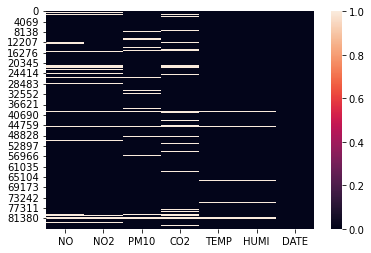

In [72]:
sns.heatmap(cleaned_data.isnull())

Drop rows that do not have any values except datetime

In [73]:
cleaned_data.dropna(thresh=6, inplace=True)

Since we are dealing with chronological data, we will fill the missing values with the ones that happened right before.

In [74]:
cleaned_data.fillna(method='bfill', inplace=True)

In [75]:
missing_values_table(cleaned_data)

Your selected stage_train_dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [76]:
cleaned_data.tail(72) # For station auber, the last 71 days have missing NO and NO2 values

,NO,NO2,PM10,CO2,TEMP,HUMI,DATE
85365,24.0,61.0,10.0,451.0,16.0,61.5,2013-01-04 00:00:00+00:00
85366,37.0,65.0,21.0,485.0,16.2,63.7,2013-01-03 23:00:00+00:00
85367,36.0,61.0,22.0,484.0,16.1,64.4,2013-01-03 22:00:00+00:00
85368,49.0,67.0,18.0,488.0,16.2,64.2,2013-01-03 21:00:00+00:00
85369,58.0,64.0,37.0,564.0,16.5,66.2,2013-01-03 20:00:00+00:00
...,...,...,...,...,...,...,...
85432,27.0,57.0,15.0,464.0,15.0,63.3,2013-01-01 05:00:00+00:00
85433,27.0,56.0,22.0,481.0,14.9,63.7,2013-01-01 04:00:00+00:00
85434,22.0,52.0,45.0,490.0,14.9,63.3,2013-01-01 03:00:00+00:00
85435,43.0,61.0,18.0,536.0,14.9,65.0,2013-01-01 02:00:00+00:00


In [77]:
# cleaned_data.loc[75720:,"NO"]=101.0
# cleaned_data.loc[75720:,"NO2"]=30.0

In [78]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76524 entries, 0 to 85436
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   NO      76524 non-null  float64            
 1   NO2     76524 non-null  float64            
 2   PM10    76524 non-null  float64            
 3   CO2     76524 non-null  float64            
 4   TEMP    76524 non-null  float64            
 5   HUMI    76524 non-null  float64            
 6   DATE    76524 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 4.7 MB


<AxesSubplot:>

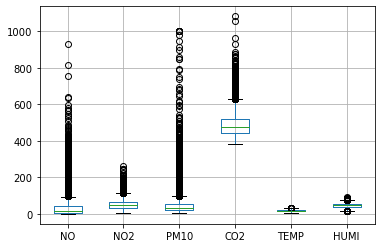

In [79]:
cleaned_data.boxplot()

There are some outliers, but our dataset is very large, so it is not that bad.

In [80]:
cleaned_data.to_csv('cleaned_franklin.csv')